In [2]:
import torch 
from torch import nn
import matplotlib.pyplot as plt


In [3]:
# Device agnostic code 
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device : {device}")

Using device : cpu


In [4]:
weight = 0.5
bias = 0.2

start = 0 
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(1)
y = weight * X + bias

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                 y,
                                 test_size = 0.2)

In [6]:
def viz(train_data = X_train,
        train_label = y_train,
        test_data = X_test,
        test_label = y_test,
        inference = None) :

    plt.figure(figsize=(14,10))
    plt.scatter(train_data,train_label, color = "red", label = "Training data")
    plt.scatter(test_data,test_label, color = "green", label = "testing data")
    plt.grid(True, linestyle = "--")

    if inference is not None :
        plt.scatter(test_data,inference, color = "black",label = "Testing inference")
    plt.legend() 

In [7]:
class Linear(nn.Module) :
    def __init__(self) -> None:
        super().__init__()   
        self.Linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1)

    def forward(self,X):
        return self.Linear_layer(X)        

In [8]:
torch.manual_seed(42)
model = Linear()   
loss_function = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.01)

In [9]:
epoch = 1000

for epoch in range(epoch):
    model.train()
    y_pred = model(X_train)
    optimizer.zero_grad()
    loss_func = loss_function(y_pred,y_train)
    loss_func.backward() 
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_function(test_pred,y_test)
    if epoch%10 == 0:
        print(f"epoch : {epoch} | loss : {loss_func} | test loss : {test_loss}")


epoch : 0 | loss : 0.5809339284896851 | test loss : 0.5613686442375183
epoch : 10 | loss : 0.3498932719230652 | test loss : 0.3378085494041443
epoch : 20 | loss : 0.2107665240764618 | test loss : 0.20325875282287598
epoch : 30 | loss : 0.12698736786842346 | test loss : 0.12229104340076447
epoch : 40 | loss : 0.07653657346963882 | test loss : 0.07357560098171234
epoch : 50 | loss : 0.04615505039691925 | test loss : 0.04427151009440422
epoch : 60 | loss : 0.027858639135956764 | test loss : 0.02664870023727417
epoch : 70 | loss : 0.01683945395052433 | test loss : 0.01605411246418953
epoch : 80 | loss : 0.010202440433204174 | test loss : 0.00968727096915245
epoch : 90 | loss : 0.006204254925251007 | test loss : 0.005862858612090349
epoch : 100 | loss : 0.003795129479840398 | test loss : 0.003566821338608861
epoch : 110 | loss : 0.00234291423112154 | test loss : 0.00218915194272995
epoch : 120 | loss : 0.0014669641386717558 | test loss : 0.001362997805699706
epoch : 130 | loss : 0.000938049

In [10]:
print(f" weight : {weight}        ,                     bias : {bias} \n Model evaluation ----------")
param = model.state_dict()
print(f" model.weight : {param['Linear_layer.weight']} , model.bias : {param['Linear_layer.bias']}")

 weight : 0.5        ,                     bias : 0.2 
 Model evaluation ----------
 model.weight : tensor([[0.4866]]) , model.bias : tensor([0.2070])


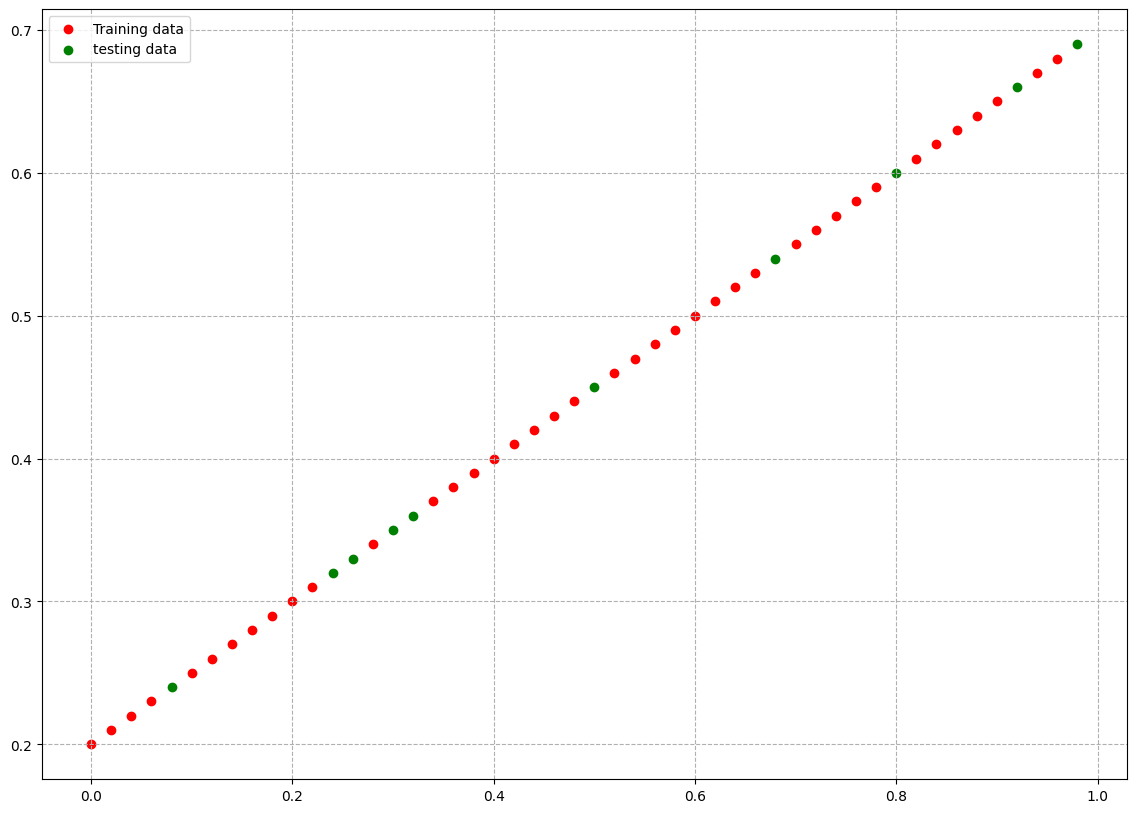

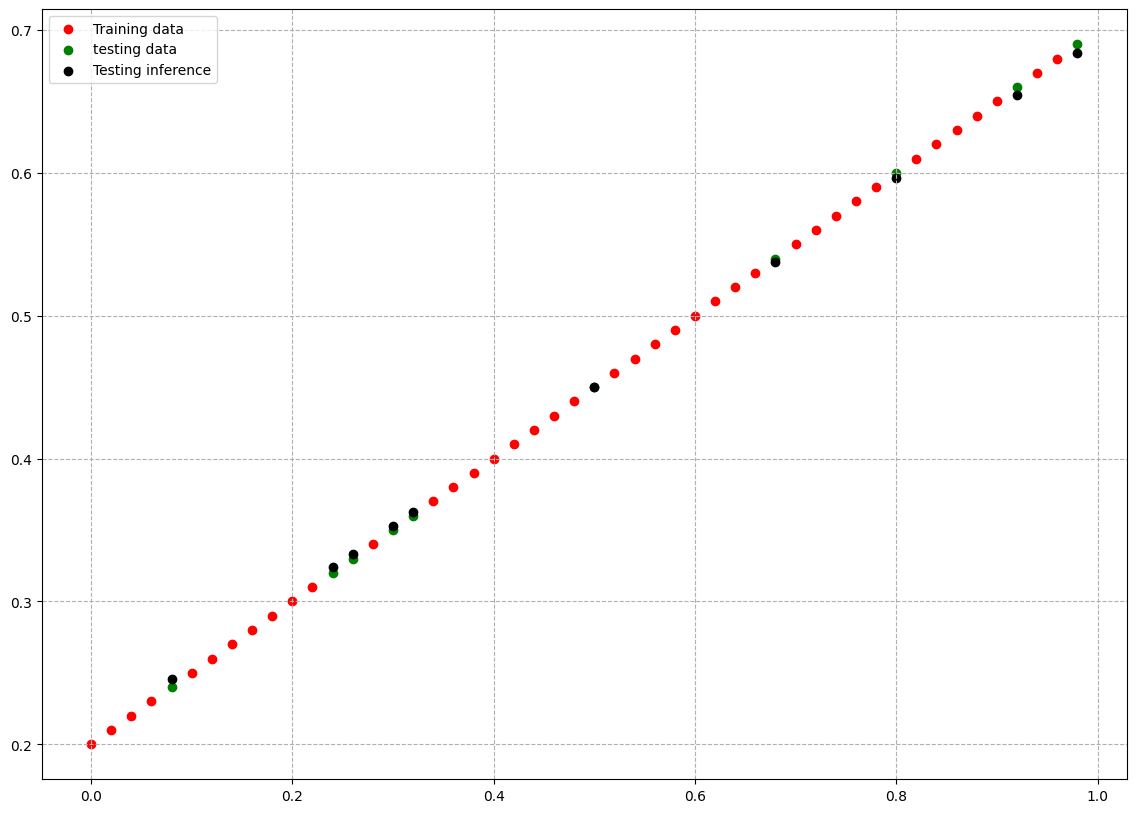

In [11]:
with torch.inference_mode():
    y_pred = model(X_test)
viz(inference=None)
viz(inference=y_pred)